# Women in AI Social Media Analysis

As the marketing team lead for Women in AI, I created this notebook to analyze our social media posts (from X or LinkedIn) to boost engagement and grow our follower base. Our non-profit aims to empower women in AI, and optimizing our LinkedIn content is key to reaching AI professionals and advocates. This analysis explores engagement patterns and key topics to inform our posting strategy.

In [2]:
# Import libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set seaborn style for clean, professional plots
sns.set_style('whitegrid')

## Load and Summarize Data

Here, I load the cleaned social media data (generated by `data_collector.py`) and compute basic statistics, like average engagement and hashtag usage. This helps establish a baseline for Women in AI’s LinkedIn and X performance, guiding our content strategy.

In [3]:
# Load cleaned Women in AI posts
women_in_ai_posts_df = pd.read_csv('../data/cleaned_women_in_ai_posts.csv')

# Calculate engagement (likes + reposts + 0.5 * replies)
women_in_ai_posts_df['engagement'] = (women_in_ai_posts_df['likes'] + 
                                     women_in_ai_posts_df['reposts'] + 
                                     0.5 * women_in_ai_posts_df['replies'])

# Print basic stats to understand post performance
print('Average engagement:', women_in_ai_posts_df['engagement'].mean())
print('Posts with hashtags:', women_in_ai_posts_df['has_hashtag'].mean() * 100, '%')

Average engagement: 1.65
Posts with hashtags: 60.0 %


## Engagement by Day of the Week

To optimize posting times for Women in AI’s LinkedIn audience (mostly AI professionals), I analyze engagement by day of the week. This plot shows which days yield the most likes, reposts, and replies, helping us schedule posts effectively.

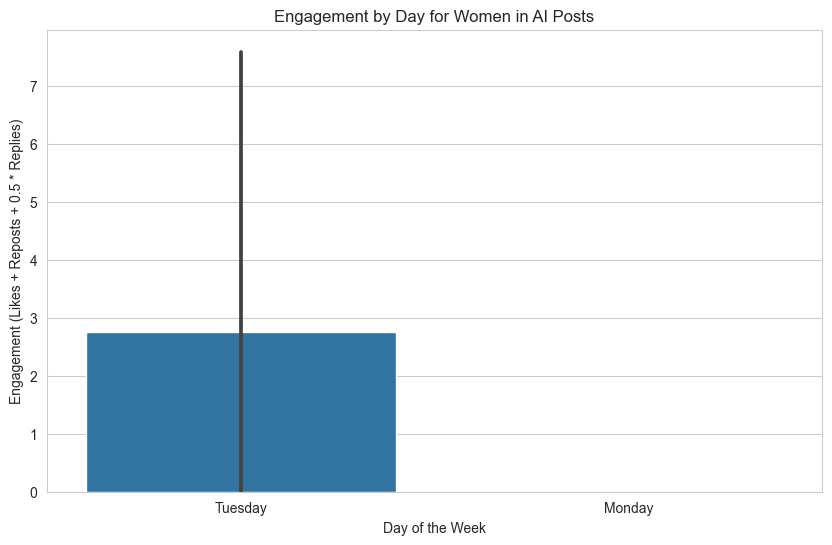

In [4]:
# Extract day of the week from timestamp
women_in_ai_posts_df['day'] = pd.to_datetime(women_in_ai_posts_df['timestamp']).dt.day_name()

# Plot engagement by day
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='engagement', data=women_in_ai_posts_df)
plt.title('Engagement by Day for Women in AI Posts')
plt.xlabel('Day of the Week')
plt.ylabel('Engagement (Likes + Reposts + 0.5 * Replies)')
plt.savefig('../figures/day_engagement.png')
plt.show()

## Word Cloud of Common Words

To identify themes that resonate with our audience, I generate a word cloud of the most frequent words in our posts. This highlights topics like 'AI ethics' or 'diversity,' which we can emphasize in future LinkedIn content to boost engagement.

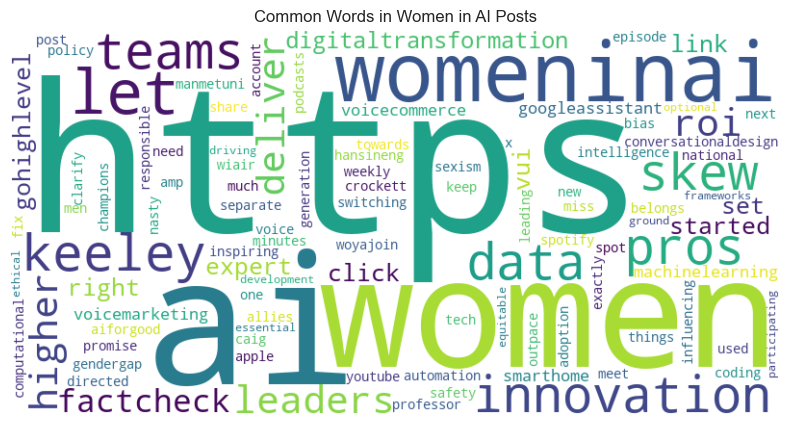

In [7]:
# Generate word cloud from cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(women_in_ai_posts_df['cleaned_text']))

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Women in AI Posts')
plt.savefig('../figures/wordcloud.png')
plt.show()